# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

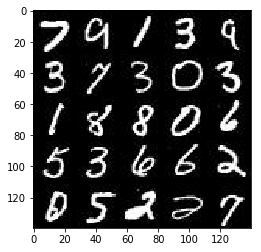

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

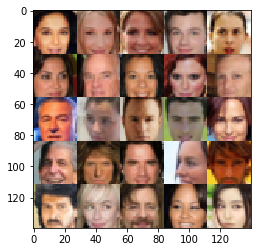

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    in_real_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'in_real_images')
    z_data = tf.placeholder(tf.float32, (None, z_dim), name = 'z_data')
    learning_rate = tf.placeholder(tf.float32, None , name = 'learning_rate')

    return in_real_images, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        #layer1 = tf.layers.batch_normalization(layer1, training=True)
        layer1 = tf.maximum(0.2 * layer1, layer1)
        #layer1 = tf.layers.dropout(layer1, 0.9)
     
        
        
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides=1, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(0.2 * layer2, layer2)
        #layer2 = tf.layers.dropout(layer2, 0.9)
        
       
    
        layer3 = tf.layers.conv2d(layer2, 256, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(0.2 * layer3, layer3)
        #layer3 = tf.layers.dropout(layer3, 0.8)

        logits = tf.layers.dense(tf.reshape(layer3,(-1,4*4*256)),1)
        out = tf.sigmoid(logits)
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        
        layer1 = tf.layers.dense(z, 7*7*256)
        
        layer1 = tf.reshape(layer1, (-1, 7, 7, 256))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(0.2 * layer1, layer1)
        

        layer2 = tf.layers.conv2d_transpose(layer1, 128, 5, strides= 2, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(0.2 * layer2, layer2)        
        

        layer3 = tf.layers.conv2d_transpose(layer2, 64, 5, strides= 2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(0.2 * layer3, layer3)
        
        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides= 1, padding='same')
        output = tf.tanh(logits) 
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels = tf.ones_like(d_model_real)*(1.0 - smooth)))
    d_loss_fake = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels = tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    inputs_real, inputs_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps    = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                batch_images *= 2
                steps += 1
                noise_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # optimizers
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: noise_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={inputs_real: batch_images, inputs_z: noise_z, learn_rate: learning_rate}) 
            
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({inputs_real : batch_images, inputs_z : noise_z, learn_rate : learning_rate})
                    train_loss_g = g_loss.eval({inputs_real : batch_images, inputs_z : noise_z, learn_rate : learning_rate})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % 100 == 0:  
                    show_generator_output(sess, n_images=25, input_z= inputs_z, out_channel_dim=data_shape[3], image_mode=data_image_mode)

                          
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 0.5834
Epoch 1/2... Discriminator Loss: 1.3496... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.3761... Generator Loss: 0.6565
Epoch 1/2... Discriminator Loss: 0.9399... Generator Loss: 1.5487
Epoch 1/2... Discriminator Loss: 0.8032... Generator Loss: 1.3181
Epoch 1/2... Discriminator Loss: 0.7266... Generator Loss: 1.4057
Epoch 1/2... Discriminator Loss: 0.8832... Generator Loss: 1.1659
Epoch 1/2... Discriminator Loss: 1.2628... Generator Loss: 0.9018
Epoch 1/2... Discriminator Loss: 1.2942... Generator Loss: 0.8498
Epoch 1/2... Discriminator Loss: 1.2995... Generator Loss: 0.7957


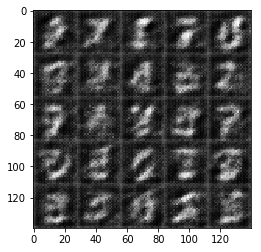

Epoch 1/2... Discriminator Loss: 1.2461... Generator Loss: 0.8627
Epoch 1/2... Discriminator Loss: 1.3196... Generator Loss: 0.8801
Epoch 1/2... Discriminator Loss: 1.2689... Generator Loss: 0.8443
Epoch 1/2... Discriminator Loss: 1.2777... Generator Loss: 0.8800
Epoch 1/2... Discriminator Loss: 1.2526... Generator Loss: 0.8400
Epoch 1/2... Discriminator Loss: 1.2453... Generator Loss: 0.8475
Epoch 1/2... Discriminator Loss: 1.2365... Generator Loss: 0.8868
Epoch 1/2... Discriminator Loss: 1.2250... Generator Loss: 0.8742
Epoch 1/2... Discriminator Loss: 1.2431... Generator Loss: 0.8366
Epoch 1/2... Discriminator Loss: 1.3570... Generator Loss: 0.9407


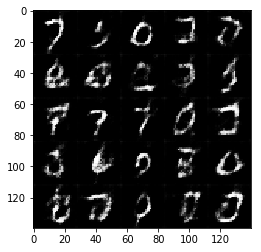

Epoch 1/2... Discriminator Loss: 1.2411... Generator Loss: 0.8670
Epoch 1/2... Discriminator Loss: 1.2143... Generator Loss: 0.8734
Epoch 1/2... Discriminator Loss: 1.3223... Generator Loss: 0.9851
Epoch 1/2... Discriminator Loss: 1.2154... Generator Loss: 0.9060
Epoch 1/2... Discriminator Loss: 1.2130... Generator Loss: 0.8646
Epoch 1/2... Discriminator Loss: 1.3042... Generator Loss: 0.9834
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.9326
Epoch 1/2... Discriminator Loss: 1.2682... Generator Loss: 0.8339
Epoch 1/2... Discriminator Loss: 1.2318... Generator Loss: 0.9446
Epoch 1/2... Discriminator Loss: 1.2670... Generator Loss: 0.9720


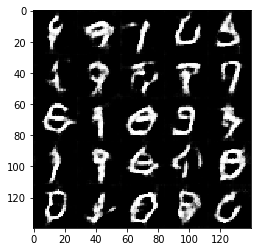

Epoch 1/2... Discriminator Loss: 1.3170... Generator Loss: 0.9505
Epoch 1/2... Discriminator Loss: 1.2599... Generator Loss: 0.8212
Epoch 1/2... Discriminator Loss: 1.2557... Generator Loss: 0.8533
Epoch 1/2... Discriminator Loss: 1.3272... Generator Loss: 0.9581
Epoch 1/2... Discriminator Loss: 1.2623... Generator Loss: 0.8133
Epoch 1/2... Discriminator Loss: 1.2481... Generator Loss: 0.8700
Epoch 1/2... Discriminator Loss: 1.2912... Generator Loss: 0.8139
Epoch 1/2... Discriminator Loss: 1.3328... Generator Loss: 0.9191
Epoch 1/2... Discriminator Loss: 1.2820... Generator Loss: 0.7485
Epoch 1/2... Discriminator Loss: 1.2789... Generator Loss: 0.9477


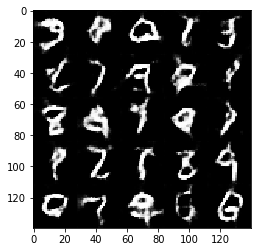

Epoch 1/2... Discriminator Loss: 1.3433... Generator Loss: 0.7748
Epoch 1/2... Discriminator Loss: 1.2603... Generator Loss: 0.8907
Epoch 1/2... Discriminator Loss: 1.2653... Generator Loss: 0.8990
Epoch 1/2... Discriminator Loss: 1.2411... Generator Loss: 0.9062
Epoch 1/2... Discriminator Loss: 1.2755... Generator Loss: 1.0962
Epoch 1/2... Discriminator Loss: 1.2634... Generator Loss: 0.9380
Epoch 1/2... Discriminator Loss: 1.2450... Generator Loss: 0.9919
Epoch 1/2... Discriminator Loss: 1.3168... Generator Loss: 0.7652
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 0.8691
Epoch 1/2... Discriminator Loss: 1.2373... Generator Loss: 1.0013


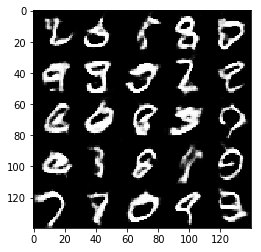

Epoch 1/2... Discriminator Loss: 1.2686... Generator Loss: 0.8635
Epoch 1/2... Discriminator Loss: 1.1720... Generator Loss: 0.9535
Epoch 1/2... Discriminator Loss: 1.2942... Generator Loss: 0.9280
Epoch 1/2... Discriminator Loss: 1.2221... Generator Loss: 0.8281
Epoch 1/2... Discriminator Loss: 1.2699... Generator Loss: 0.7999
Epoch 1/2... Discriminator Loss: 1.4878... Generator Loss: 1.0253
Epoch 1/2... Discriminator Loss: 1.2935... Generator Loss: 0.8179
Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 0.9260
Epoch 1/2... Discriminator Loss: 1.2250... Generator Loss: 1.0547
Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 0.7234


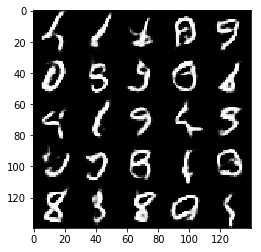

Epoch 1/2... Discriminator Loss: 1.1755... Generator Loss: 1.0070
Epoch 1/2... Discriminator Loss: 1.2466... Generator Loss: 0.8609
Epoch 1/2... Discriminator Loss: 1.1904... Generator Loss: 1.0929
Epoch 1/2... Discriminator Loss: 1.2685... Generator Loss: 1.1391
Epoch 1/2... Discriminator Loss: 1.1706... Generator Loss: 0.9462
Epoch 1/2... Discriminator Loss: 1.3869... Generator Loss: 0.6098
Epoch 1/2... Discriminator Loss: 1.2572... Generator Loss: 0.7172
Epoch 1/2... Discriminator Loss: 1.1565... Generator Loss: 1.0151
Epoch 1/2... Discriminator Loss: 1.3488... Generator Loss: 0.8453
Epoch 1/2... Discriminator Loss: 1.1915... Generator Loss: 0.9562


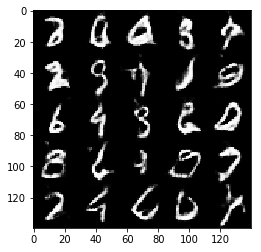

Epoch 1/2... Discriminator Loss: 1.1876... Generator Loss: 1.1755
Epoch 1/2... Discriminator Loss: 1.1608... Generator Loss: 0.8753
Epoch 1/2... Discriminator Loss: 1.3841... Generator Loss: 0.7229
Epoch 1/2... Discriminator Loss: 1.1337... Generator Loss: 0.8830
Epoch 1/2... Discriminator Loss: 1.1057... Generator Loss: 1.0885
Epoch 1/2... Discriminator Loss: 1.1354... Generator Loss: 1.0938
Epoch 1/2... Discriminator Loss: 1.2050... Generator Loss: 0.8404
Epoch 1/2... Discriminator Loss: 1.2903... Generator Loss: 1.1886
Epoch 1/2... Discriminator Loss: 1.1814... Generator Loss: 0.8611
Epoch 1/2... Discriminator Loss: 1.4274... Generator Loss: 0.5044


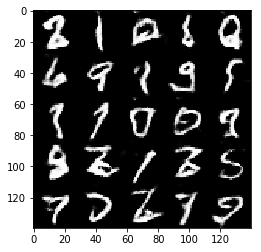

Epoch 1/2... Discriminator Loss: 1.1539... Generator Loss: 1.1642
Epoch 1/2... Discriminator Loss: 1.1502... Generator Loss: 1.0592
Epoch 1/2... Discriminator Loss: 1.1172... Generator Loss: 1.0359
Epoch 1/2... Discriminator Loss: 1.1569... Generator Loss: 0.7749
Epoch 1/2... Discriminator Loss: 1.0691... Generator Loss: 0.9211
Epoch 1/2... Discriminator Loss: 1.2769... Generator Loss: 0.6980
Epoch 1/2... Discriminator Loss: 1.1475... Generator Loss: 0.9256
Epoch 1/2... Discriminator Loss: 1.1473... Generator Loss: 1.1611
Epoch 1/2... Discriminator Loss: 1.1649... Generator Loss: 0.8299
Epoch 1/2... Discriminator Loss: 1.1683... Generator Loss: 0.8222


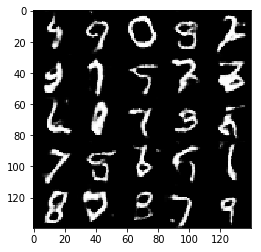

Epoch 1/2... Discriminator Loss: 1.6593... Generator Loss: 1.0736
Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 0.9386
Epoch 1/2... Discriminator Loss: 1.1123... Generator Loss: 0.9449
Epoch 2/2... Discriminator Loss: 1.2410... Generator Loss: 0.7218
Epoch 2/2... Discriminator Loss: 1.2808... Generator Loss: 0.6047
Epoch 2/2... Discriminator Loss: 1.0607... Generator Loss: 0.9997
Epoch 2/2... Discriminator Loss: 1.1077... Generator Loss: 1.0039
Epoch 2/2... Discriminator Loss: 1.0811... Generator Loss: 0.8198
Epoch 2/2... Discriminator Loss: 1.1660... Generator Loss: 0.9895
Epoch 2/2... Discriminator Loss: 1.2312... Generator Loss: 0.7196


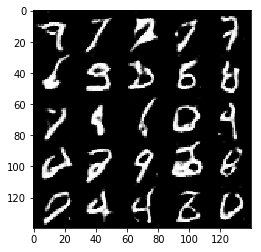

Epoch 2/2... Discriminator Loss: 1.0513... Generator Loss: 1.0588
Epoch 2/2... Discriminator Loss: 1.0590... Generator Loss: 1.2400
Epoch 2/2... Discriminator Loss: 1.2784... Generator Loss: 0.6183
Epoch 2/2... Discriminator Loss: 1.1744... Generator Loss: 0.7236
Epoch 2/2... Discriminator Loss: 1.0582... Generator Loss: 0.9514
Epoch 2/2... Discriminator Loss: 1.1003... Generator Loss: 1.6240
Epoch 2/2... Discriminator Loss: 1.1020... Generator Loss: 0.8499
Epoch 2/2... Discriminator Loss: 1.0770... Generator Loss: 1.0336
Epoch 2/2... Discriminator Loss: 1.2616... Generator Loss: 0.6451
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 1.8482


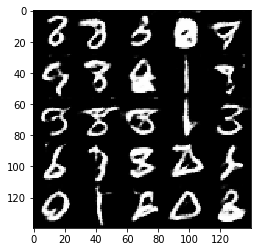

Epoch 2/2... Discriminator Loss: 1.0651... Generator Loss: 1.3966
Epoch 2/2... Discriminator Loss: 1.1613... Generator Loss: 0.8135
Epoch 2/2... Discriminator Loss: 1.1310... Generator Loss: 0.7251
Epoch 2/2... Discriminator Loss: 1.0147... Generator Loss: 0.9676
Epoch 2/2... Discriminator Loss: 1.0947... Generator Loss: 0.9886
Epoch 2/2... Discriminator Loss: 0.9593... Generator Loss: 1.2797
Epoch 2/2... Discriminator Loss: 1.1255... Generator Loss: 1.1743
Epoch 2/2... Discriminator Loss: 1.1604... Generator Loss: 1.2832
Epoch 2/2... Discriminator Loss: 0.9933... Generator Loss: 0.9758
Epoch 2/2... Discriminator Loss: 1.0220... Generator Loss: 0.9395


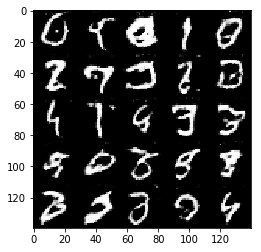

Epoch 2/2... Discriminator Loss: 1.0270... Generator Loss: 1.1397
Epoch 2/2... Discriminator Loss: 1.1099... Generator Loss: 0.8675
Epoch 2/2... Discriminator Loss: 1.2060... Generator Loss: 0.9670
Epoch 2/2... Discriminator Loss: 1.0441... Generator Loss: 1.1177
Epoch 2/2... Discriminator Loss: 1.0375... Generator Loss: 1.6360
Epoch 2/2... Discriminator Loss: 1.2379... Generator Loss: 1.6937
Epoch 2/2... Discriminator Loss: 0.9686... Generator Loss: 1.0104
Epoch 2/2... Discriminator Loss: 0.9593... Generator Loss: 1.3830
Epoch 2/2... Discriminator Loss: 1.6256... Generator Loss: 1.0698
Epoch 2/2... Discriminator Loss: 0.8564... Generator Loss: 1.3194


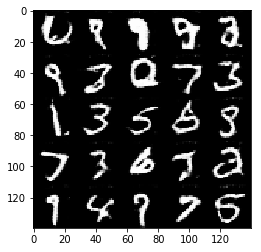

Epoch 2/2... Discriminator Loss: 1.0484... Generator Loss: 1.1765
Epoch 2/2... Discriminator Loss: 1.0032... Generator Loss: 0.9019
Epoch 2/2... Discriminator Loss: 0.9237... Generator Loss: 1.0919
Epoch 2/2... Discriminator Loss: 0.8416... Generator Loss: 1.6370
Epoch 2/2... Discriminator Loss: 0.9731... Generator Loss: 1.4276
Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 1.6914
Epoch 2/2... Discriminator Loss: 1.0919... Generator Loss: 0.8339
Epoch 2/2... Discriminator Loss: 1.0049... Generator Loss: 1.4177
Epoch 2/2... Discriminator Loss: 0.9470... Generator Loss: 1.3252
Epoch 2/2... Discriminator Loss: 1.3339... Generator Loss: 0.5883


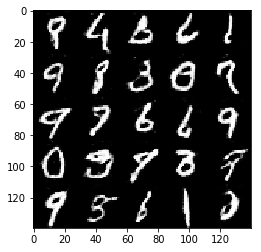

Epoch 2/2... Discriminator Loss: 0.9505... Generator Loss: 1.6566
Epoch 2/2... Discriminator Loss: 0.8592... Generator Loss: 1.2868
Epoch 2/2... Discriminator Loss: 1.1469... Generator Loss: 0.7336
Epoch 2/2... Discriminator Loss: 0.9563... Generator Loss: 1.1670
Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 1.4005
Epoch 2/2... Discriminator Loss: 0.7274... Generator Loss: 1.4325
Epoch 2/2... Discriminator Loss: 1.0053... Generator Loss: 1.6670
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 1.1949
Epoch 2/2... Discriminator Loss: 1.2577... Generator Loss: 0.7698
Epoch 2/2... Discriminator Loss: 0.9436... Generator Loss: 1.0598


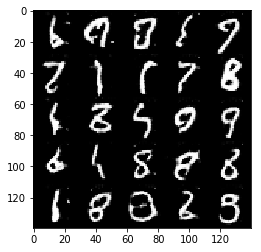

Epoch 2/2... Discriminator Loss: 1.2336... Generator Loss: 0.6199
Epoch 2/2... Discriminator Loss: 0.8185... Generator Loss: 1.1629
Epoch 2/2... Discriminator Loss: 0.9226... Generator Loss: 0.9920
Epoch 2/2... Discriminator Loss: 1.0064... Generator Loss: 0.9578
Epoch 2/2... Discriminator Loss: 0.7871... Generator Loss: 1.4589
Epoch 2/2... Discriminator Loss: 0.9494... Generator Loss: 1.3345
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 1.0067
Epoch 2/2... Discriminator Loss: 0.8215... Generator Loss: 1.3108
Epoch 2/2... Discriminator Loss: 0.8597... Generator Loss: 1.3523
Epoch 2/2... Discriminator Loss: 1.8661... Generator Loss: 2.3829


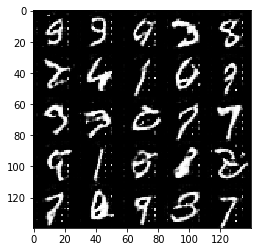

Epoch 2/2... Discriminator Loss: 0.9067... Generator Loss: 1.0747
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 0.8958
Epoch 2/2... Discriminator Loss: 1.0747... Generator Loss: 1.3375
Epoch 2/2... Discriminator Loss: 1.0204... Generator Loss: 0.8515
Epoch 2/2... Discriminator Loss: 0.8277... Generator Loss: 1.3755
Epoch 2/2... Discriminator Loss: 0.8616... Generator Loss: 1.7861
Epoch 2/2... Discriminator Loss: 0.8692... Generator Loss: 1.4019
Epoch 2/2... Discriminator Loss: 0.7588... Generator Loss: 1.3374
Epoch 2/2... Discriminator Loss: 1.0239... Generator Loss: 1.0053
Epoch 2/2... Discriminator Loss: 1.0629... Generator Loss: 0.9611


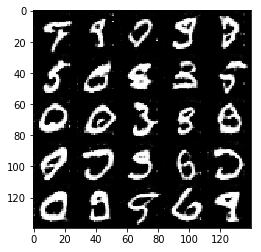

Epoch 2/2... Discriminator Loss: 0.9054... Generator Loss: 1.7068
Epoch 2/2... Discriminator Loss: 1.0260... Generator Loss: 0.8136
Epoch 2/2... Discriminator Loss: 0.8404... Generator Loss: 1.4767
Epoch 2/2... Discriminator Loss: 0.7254... Generator Loss: 1.4864
Epoch 2/2... Discriminator Loss: 1.0210... Generator Loss: 1.4671
Epoch 2/2... Discriminator Loss: 1.1195... Generator Loss: 0.8035
Epoch 2/2... Discriminator Loss: 0.8584... Generator Loss: 1.3004
Epoch 2/2... Discriminator Loss: 1.4662... Generator Loss: 2.1731
Epoch 2/2... Discriminator Loss: 1.0873... Generator Loss: 0.8756
Epoch 2/2... Discriminator Loss: 0.8251... Generator Loss: 1.1325


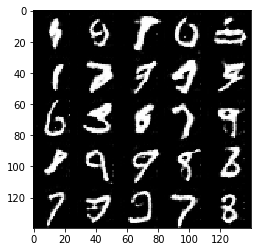

Epoch 2/2... Discriminator Loss: 1.1077... Generator Loss: 0.7007
Epoch 2/2... Discriminator Loss: 2.2555... Generator Loss: 1.6281
Epoch 2/2... Discriminator Loss: 0.9925... Generator Loss: 1.0403
Epoch 2/2... Discriminator Loss: 0.9368... Generator Loss: 1.1552
Epoch 2/2... Discriminator Loss: 1.0875... Generator Loss: 1.4882
Epoch 2/2... Discriminator Loss: 0.8091... Generator Loss: 1.3212
Epoch 2/2... Discriminator Loss: 0.9028... Generator Loss: 1.0182


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.7706... Generator Loss: 0.4830
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.6135... Generator Loss: 0.5927
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.8718
Epoch 1/1... Discriminator Loss: 1.2161... Generator Loss: 0.8704
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.8673
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.9859
Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 0.9055
Epoch 1/1... Discriminator Loss: 0.9227... Generator Loss: 1.1622
Epoch 1/1... Discriminator Loss: 0.8726... Generator Loss: 1.4495


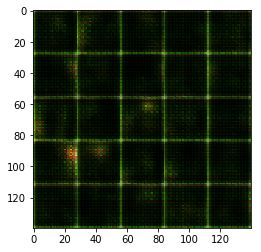

Epoch 1/1... Discriminator Loss: 0.8772... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 0.6963... Generator Loss: 1.4699
Epoch 1/1... Discriminator Loss: 0.7824... Generator Loss: 1.7541
Epoch 1/1... Discriminator Loss: 0.5034... Generator Loss: 2.2160
Epoch 1/1... Discriminator Loss: 0.7818... Generator Loss: 2.0086
Epoch 1/1... Discriminator Loss: 1.1175... Generator Loss: 1.2246
Epoch 1/1... Discriminator Loss: 0.8139... Generator Loss: 1.7437
Epoch 1/1... Discriminator Loss: 0.4439... Generator Loss: 2.5460
Epoch 1/1... Discriminator Loss: 0.4780... Generator Loss: 2.5545
Epoch 1/1... Discriminator Loss: 1.7018... Generator Loss: 1.4655


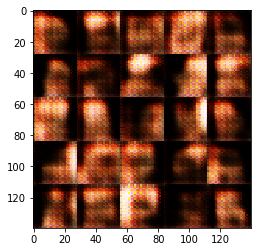

Epoch 1/1... Discriminator Loss: 0.9402... Generator Loss: 1.7716
Epoch 1/1... Discriminator Loss: 1.0198... Generator Loss: 1.9181
Epoch 1/1... Discriminator Loss: 1.0295... Generator Loss: 1.4877
Epoch 1/1... Discriminator Loss: 0.9937... Generator Loss: 1.0390
Epoch 1/1... Discriminator Loss: 0.8336... Generator Loss: 1.7113
Epoch 1/1... Discriminator Loss: 1.1667... Generator Loss: 0.9941
Epoch 1/1... Discriminator Loss: 0.9998... Generator Loss: 1.7489
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 1.2316
Epoch 1/1... Discriminator Loss: 1.1713... Generator Loss: 1.3210
Epoch 1/1... Discriminator Loss: 1.1982... Generator Loss: 1.3198


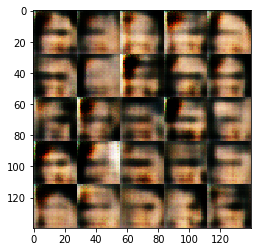

Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 0.8852
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 0.7743
Epoch 1/1... Discriminator Loss: 0.8564... Generator Loss: 1.5153
Epoch 1/1... Discriminator Loss: 1.2501... Generator Loss: 1.7618
Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 1.4735
Epoch 1/1... Discriminator Loss: 1.1847... Generator Loss: 0.8653
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 1.0692
Epoch 1/1... Discriminator Loss: 1.1079... Generator Loss: 1.2991
Epoch 1/1... Discriminator Loss: 1.1230... Generator Loss: 0.8557
Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 1.0511


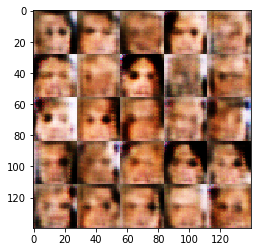

Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 0.9367
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 0.9006
Epoch 1/1... Discriminator Loss: 1.2324... Generator Loss: 0.8248
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 1.2762
Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 1.0570
Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.9998
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.9192
Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 0.8980


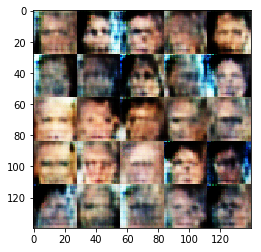

Epoch 1/1... Discriminator Loss: 2.0093... Generator Loss: 2.1404
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 0.9968
Epoch 1/1... Discriminator Loss: 1.1964... Generator Loss: 0.9104
Epoch 1/1... Discriminator Loss: 1.2631... Generator Loss: 0.9650
Epoch 1/1... Discriminator Loss: 1.0629... Generator Loss: 1.2136
Epoch 1/1... Discriminator Loss: 1.0604... Generator Loss: 1.1947
Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 1.8025
Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.7759
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 0.8832
Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 0.9238


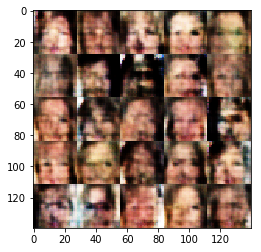

Epoch 1/1... Discriminator Loss: 1.1033... Generator Loss: 1.0352
Epoch 1/1... Discriminator Loss: 1.1686... Generator Loss: 0.8478
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.5870
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 0.8357
Epoch 1/1... Discriminator Loss: 1.0046... Generator Loss: 1.0199
Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.8196
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.2546... Generator Loss: 1.2075
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 0.9864
Epoch 1/1... Discriminator Loss: 1.1242... Generator Loss: 1.2015


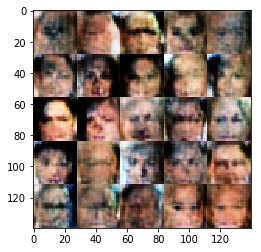

Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 0.5944
Epoch 1/1... Discriminator Loss: 1.0994... Generator Loss: 1.0513
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 1.1238... Generator Loss: 1.0207
Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 0.9996
Epoch 1/1... Discriminator Loss: 1.5602... Generator Loss: 1.6209
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 1.0666... Generator Loss: 1.1015
Epoch 1/1... Discriminator Loss: 1.5405... Generator Loss: 0.4430
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 0.8711


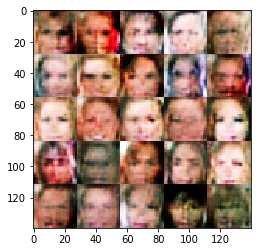

Epoch 1/1... Discriminator Loss: 1.1892... Generator Loss: 1.1577
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 1.3044
Epoch 1/1... Discriminator Loss: 1.1935... Generator Loss: 1.1784
Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 0.8338
Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.8287
Epoch 1/1... Discriminator Loss: 0.9306... Generator Loss: 1.6021
Epoch 1/1... Discriminator Loss: 2.7559... Generator Loss: 1.5306
Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 0.9879
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 1.0259


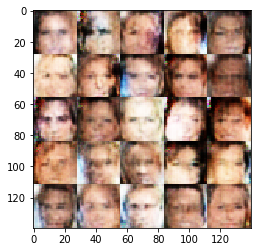

Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 1.1648
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 1.4568
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 1.2368... Generator Loss: 1.2547
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 1.0156
Epoch 1/1... Discriminator Loss: 0.9219... Generator Loss: 1.2856


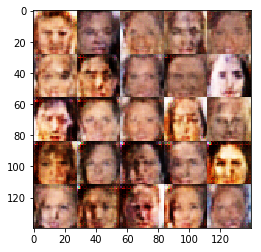

Epoch 1/1... Discriminator Loss: 1.1809... Generator Loss: 0.8397
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.5038
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 0.8702
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 1.6472
Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 1.1480... Generator Loss: 0.9378
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 0.7995... Generator Loss: 1.9819


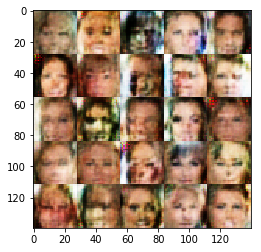

Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.9055
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 1.2364
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.1263... Generator Loss: 1.0561
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 0.9062
Epoch 1/1... Discriminator Loss: 1.5492... Generator Loss: 1.0418
Epoch 1/1... Discriminator Loss: 1.2371... Generator Loss: 0.9319
Epoch 1/1... Discriminator Loss: 1.4993... Generator Loss: 1.3676


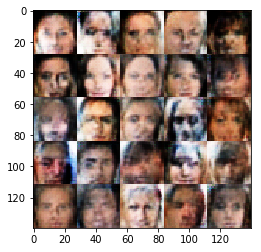

Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.8270
Epoch 1/1... Discriminator Loss: 1.0893... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.7914
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 1.0605
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.9604
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 1.4491
Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 0.7965
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 1.3214
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.8511


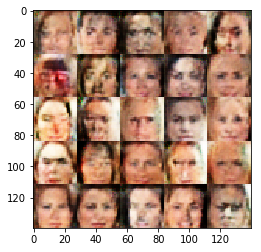

Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 1.0366
Epoch 1/1... Discriminator Loss: 1.2903... Generator Loss: 0.9011
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.1152... Generator Loss: 0.9225
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.6436
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 1.2447
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.9897


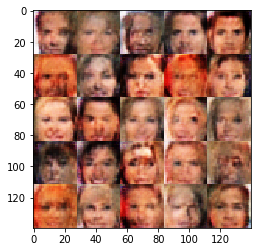

Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 1.2398... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.6074
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 1.4875... Generator Loss: 0.9013
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 0.9379
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 0.7969
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 0.7664
Epoch 1/1... Discriminator Loss: 1.1445... Generator Loss: 0.9287
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 1.0092


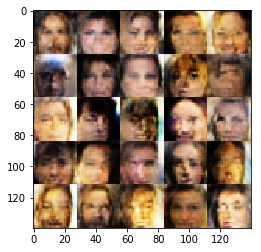

Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 0.8752
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 1.0125
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.8644
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.8070


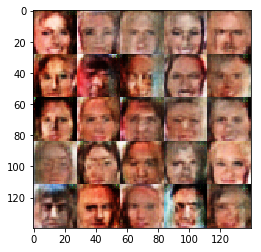

Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.2732... Generator Loss: 0.8635
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.8133
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 0.9152
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.8224
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.7657


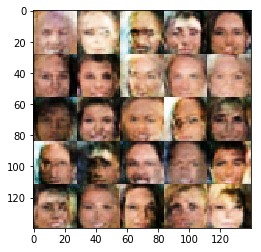

Epoch 1/1... Discriminator Loss: 1.3178... Generator Loss: 0.7792
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 1.1020
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.8752
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 1.4609... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.7918
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 0.8714


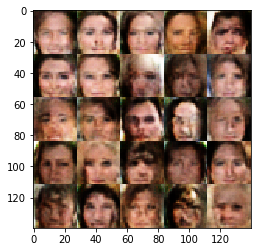

Epoch 1/1... Discriminator Loss: 1.3428... Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 1.2334... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 0.7128
Epoch 1/1... Discriminator Loss: 1.2170... Generator Loss: 0.9775
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 0.8116
Epoch 1/1... Discriminator Loss: 1.2660... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.2917... Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.8421
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.7555


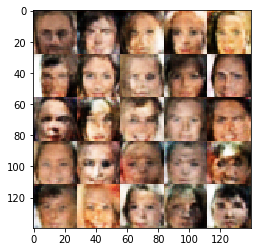

Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 1.0570
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.8823
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.9151
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 0.8509
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.8265


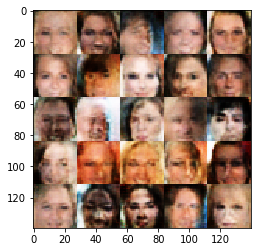

Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.9516
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7099
Epoch 1/1... Discriminator Loss: 1.5085... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.9103
Epoch 1/1... Discriminator Loss: 1.2072... Generator Loss: 1.0574
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.7435
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.8500


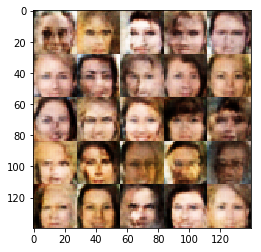

Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.1771... Generator Loss: 0.9937
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7803
Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.9492
Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 0.8330


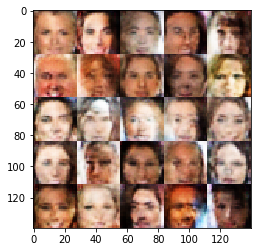

Epoch 1/1... Discriminator Loss: 1.2766... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.8428


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.